In [1]:
  !pip install wandb -qU
  import wandb
  wandb.login(key='2b25045507d6a89b66edf89be892f3687346ed10')

wandb: Currently logged in as: ee21s125. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

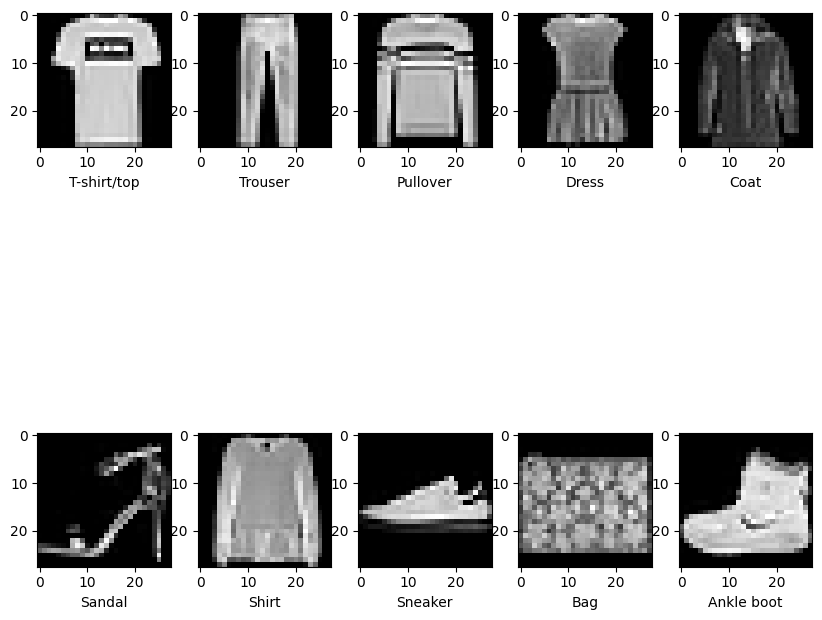

In [2]:
#Visualizing the dataset
!pip install wandb -qU
import wandb
wandb.login(key='2b25045507d6a89b66edf89be892f3687346ed10')
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


def visualize(X,Y):
  unique_classes = np.unique(Y);
  class_names = {
        unique_classes[0]: 'T-shirt/top',
        unique_classes[1]: 'Trouser',
        unique_classes[2]: 'Pullover',
        unique_classes[3]: 'Dress',
        unique_classes[4]: 'Coat',
        unique_classes[5]: 'Sandal',
        unique_classes[6]: 'Shirt',
        unique_classes[7]: 'Sneaker',
        unique_classes[8]: 'Bag',
        unique_classes[9]: 'Ankle boot'
  };
  counter = np.zeros(unique_classes.shape);
  plt.figure(figsize=(10, 10));
  for i in range(len(unique_classes)):
    for j in range(len(Y)):
      if((Y[j]==i) and (counter[i]==0)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[j], cmap=plt.get_cmap('gray'));
        plt.xlabel(class_names[i]);
        counter[i] = 1;

  plt.show();

def main():
    # Load Fashion-MNIST dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data();

    assert x_train.shape == (60000, 28, 28);
    assert x_test.shape == (10000, 28, 28);
    assert y_train.shape == (60000,);
    assert y_test.shape == (10000,);

    visualize(x_train,y_train);



if __name__ == "__main__":
    main()



In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0';
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import time

class neuralNetwork:
  def __init__(self, num_inputs, num_hidden_layers, hidden_layers_nodes, learning_rate, num_epochs, weight_init, activation_fn, loss_fn, num_train_data, num_validation_data, optimiser, weight_decay, batch_size,
               gamma, epsilon, beta, beta1, beta2, x_train, y_train, x_valid, y_valid):

        self.num_inputs = num_inputs;
        self.num_hidden_layers = num_hidden_layers;
        self.hidden_layers_nodes = hidden_layers_nodes;
        self.num_outputs = 10;
        self.num_epochs = num_epochs;
        self.learning_rate = learning_rate;
        self.weight_init = weight_init;
        self.activation_fn = activation_fn;
        self.loss_fn = loss_fn;
        self.num_train_data = num_train_data;
        self.num_validation_data = num_validation_data;
        self.optimiser = optimiser;
        self.weight_decay = weight_decay;
        self.batch_size = batch_size;

        self.gamma = gamma;
        self.epsilon = epsilon;
        self.beta = beta;
        self.beta1 = beta1;
        self.beta2 = beta2;

        self.x_train = x_train;
        self.y_train = y_train;
        self.x_valid = x_valid;
        self.y_valid = y_valid;

        num_hidden = [self.hidden_layers_nodes for i in range(num_hidden_layers)];

        self.num_nodes = [self.num_inputs] +  num_hidden + [self.num_outputs];
        print(self.num_nodes);
        self.weights, self.biases = self.initializeParameters();


  def xavierInitialize(self, in_dim, out_dim):
        xavier_stddev = np.sqrt(2 / (in_dim + out_dim));
        return np.random.normal(0, xavier_stddev, size=(in_dim, out_dim));

  def randomInitialize(self, in_dim, out_dim):
        return np.random.normal(0, 1, size=(in_dim, out_dim));

  def HeInitialize(self, in_dim, out_dim):
        He_stddev = np.sqrt(2 / (in_dim));
        return np.random.normal(0, 1, size=(out_dim, in_dim)) * He_stddev;

  def initializeParameters(self):
        weights = [];
        biases = [];
        if(self.weight_init=="random"):
          for i in range(len(self.num_nodes)-1):
            weights.append(self.randomInitialize(self.num_nodes[i],self.num_nodes[i+1]));
            biases.append(self.randomInitialize(1,self.num_nodes[i+1]));
        elif(self.weight_init=="xavier"):
          for i in range(len(self.num_nodes)-1):
            weights.append(self.xavierInitialize(self.num_nodes[i],self.num_nodes[i+1]));
            biases.append(self.xavierInitialize(1,self.num_nodes[i+1]));
        return weights, biases;


  def forwardPropagate(self,X,weights,biases):
        H = [X];
        A = [];
        for i in range(len(weights)):

            A_temp = np.dot(H[-1], weights[i]) + biases[i];
            if(i==len(self.weights)-1):
              H_temp = self.softmax(A_temp);
            else:
                if(self.activation_fn == "sigmoid"):
                  H_temp = self.sigmoid(A_temp);
                elif(self.activation_fn == "ReLU"):
                  H_temp = self.ReLU(A_temp);
                elif(self.activation_fn == "tanh"):
                  H_temp = self.tanh(A_temp);
            H.append(H_temp);
            A.append(A_temp);
        Y = H[-1];

        return Y,H,A;

  def sigmoid(self, Z):
        return np.exp(Z) / (np.exp(Z) + 1);

  def tanh(self, Z):
        return np.tanh(Z);

  def ReLU(self, Z):
        return (Z>0)*(Z) + ((Z<0)*Z*0.01);
        #return np.maximum(Z,0);

  def derievative_sigmoid(self, Z):
        return  (1.0 / (1 + np.exp(-Z)))*(1 -  1.0 / (1 + np.exp(-Z)));

  def derievative_tanh(self, Z):
        return 1 - np.tanh(Z)**2;


  def derievative_ReLU(self, Z):
        return (Z>0)*np.ones(Z.shape) + (Z<0)*(0.01*np.ones(Z.shape));
        #return np.where(Z > 0, 1, 0);

  def softmax(self,Z):
        assert len(Z.shape) == 2;
        s = np.max(Z, axis=1);
        s = s[:, np.newaxis];
        e_x = np.exp(Z - s);
        div = np.sum(e_x, axis=1);
        div = div[:, np.newaxis];
        return e_x / div;

  def backPropagate(self,Y, H, A, Y_train):


        gradients_weights = [];
        gradients_biases = [];

        num_layers = len(self.num_nodes);


        grad_A = [];
        grad_W = [];
        grad_H = [];
        grad_B = [];

        for i in range(num_layers-1):
          if(i==0):
            if(self.loss_fn == "crossEntropy"):
              grad_A_temp = -(Y_train - Y).T;
            elif(self.loss_fn == "MSE"):
              grad_A_temp = np.multiply(2 * (Y - Y_train), np.multiply(Y, (1 - Y))).T;

            if(self.weight_decay==0):
              grad_W_temp = np.outer(grad_A_temp,H[num_layers-1-(i+1)]);
            else:
              grad_W_temp = np.outer(grad_A_temp,H[num_layers-1-(i+1)]) + (self.weight_decay * self.weights[num_layers-1-(i+1)]).T;
            grad_B_temp = grad_A_temp;

            grad_H_temp = np.dot(self.weights[num_layers-1-(i+1)],grad_A_temp);
          else:

            if self.activation_fn == "ReLU":
              grad_A_temp = np.multiply(grad_H[i-1],self.derievative_ReLU(A[num_layers-1-(i+1)]).T);
            elif self.activation_fn == "tanh":
              grad_A_temp = np.multiply(grad_H[i-1],self.derievative_tanh(A[num_layers-1-(i+1)]).T);
            elif self.activation_fn == "sigmoid":
              grad_A_temp = np.multiply(grad_H[i-1],self.derievative_sigmoid(A[num_layers-1-(i+1)]).T);

            if(self.weight_decay==0):
              grad_W_temp = np.outer(grad_A_temp,H[num_layers-1-(i+1)]);
            else:
              grad_W_temp = np.outer(grad_A_temp,H[num_layers-1-(i+1)])+ (self.weight_decay * self.weights[num_layers-1-(i+1)]).T;
            grad_B_temp = grad_A_temp;
            grad_H_temp = np.dot(self.weights[num_layers-1-(i+1)],grad_A_temp);


          grad_A.append(grad_A_temp);
          grad_H.append(grad_H_temp);

          gradients_weights.append(grad_W_temp);
          gradients_biases.append(grad_B_temp);



        return gradients_weights, gradients_biases;


  def predict(self,X):
        Y_pred = []

        for x in X:
            Y, H, A = self.forwardPropagate(x,self.weights,self.biases);
            Y_pred.append(Y);

        return Y_pred;


  def calculateCrossEntropyLoss(self,Y_true,Y_pred):
        epsilon = 1e-15
        CE = [-Y_true[i] * np.log(Y_pred[i] + epsilon) for i in range(len(Y_pred))];
        crossEntropy = np.mean(CE);
        return crossEntropy;


  def calculateMeanSquaredErrorLoss(self, Y_true, Y_pred):
        MSE = np.mean((Y_true - Y_pred) ** 2);
        return MSE;

  def accuracy(self, Y_true, Y_pred, num_data):
        Y_true_label = [];
        Y_pred_label = [];
        ctr = 0;
        for i in range(num_data):
            Y_true_label.append(np.argmax(Y_true[i]));
            Y_pred_label.append(np.argmax(Y_pred[i]));
            if Y_true_label[i] == Y_pred_label[i]:
                ctr += 1;
        accuracy = ctr / num_data;
        return accuracy;

  def L2RegularisationLoss(self):
        return self.weight_decay * np.sum([np.linalg.norm(self.weights[i])** 2 for i in range(len(self.weights))])


  def sgd(self):

        training_loss = [];
        training_accuracy = [];
        validation_accuracy = [];

        num_layers = len(self.num_nodes)-1;

        X_train = self.x_train;
        Y_train = np.zeros((self.num_train_data,self.num_outputs));
        Y_valid = np.zeros((self.num_validation_data,self.num_outputs));
        for i in range(self.num_train_data):
          value = self.y_train[i];
          Y_train[i][int(value)] = 1.0;

        for i in range(self.num_validation_data):
          value = self.y_valid[i];
          Y_valid[i][int(value)] = 1.0;

        valid_loss = [];
        for epoch in range(self.num_epochs):
            start_time = time.time();
            loss = [];
            dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
            dB = [np.zeros((1,self.num_nodes[l + 1]))for l in range(len(self.num_nodes) - 1)];

            for i in range(self.num_train_data):
                Y, H, A = self.forwardPropagate(X_train[i],self.weights,self.biases);

                grad_weights, grad_biases = self.backPropagate(Y, H, A, Y_train[i].reshape(1,self.num_outputs));

                dW = [ grad_weights[num_layers - 1 - i].T for i in range(num_layers)];
                dB = [grad_biases[num_layers - 1 - i].T for i in range(num_layers)];

                if self.loss_fn == "MSE":
                    loss.append(self.calculateMeanSquaredErrorLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());
                elif self.loss_fn == "crossEntropy":
                    loss.append(self.calculateCrossEntropyLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());


                self.weights = [(self.weights[i] - self.learning_rate * dW[i]) for i in range(len(self.weights))];
                self.biases = [(self.biases[i] - self.learning_rate * dB[i]) for i in range(len(self.biases))];

            elapsed = time.time() - start_time;


            Y_pred = self.predict(X_train);
            training_loss.append(np.mean(loss))
            training_accuracy.append(self.accuracy(Y_train, Y_pred, self.num_train_data));
            Y_pred_valid = self.predict(x_valid);
            validation_accuracy.append(self.accuracy(Y_valid, Y_pred_valid,self.num_validation_data));
            for j in range(self.num_validation_data):
              valid_loss.append(self.calculateCrossEntropyLoss(Y_valid[j].reshape(1,self.num_outputs), Y_pred_valid[j]) + self.L2RegularisationLoss());
            print("Epoch:",epoch," Loss:",training_loss[epoch]," Training accuracy:", training_accuracy[epoch]," Validation Accuracy:",validation_accuracy[epoch] , " Time:",elapsed," Learning Rate:",self.learning_rate, "Validation loss:",np.mean(valid_loss));

            wandb.log({'loss':np.mean(loss), 'training_accuracy':training_accuracy[epoch], 'validation_accuracy':validation_accuracy[epoch],'epoch':epoch,'validation_loss':np.mean(valid_loss) });

        return training_loss, training_accuracy, validation_accuracy, Y_pred;



  def mgd(self):
        training_loss = [];
        training_accuracy = [];
        validation_accuracy = [];

        num_layers = len(self.num_nodes)-1;

        X_train = self.x_train;
        Y_train = np.zeros((self.num_train_data,self.num_outputs));
        Y_valid = np.zeros((self.num_validation_data,self.num_outputs));

        for i in range(self.num_train_data):
          value = self.y_train[i];
          Y_train[i][int(value)] = 1.0;

        for i in range(self.num_validation_data):
          value = self.y_valid[i];
          Y_valid[i][int(value)] = 1.0;

        prev_v_w  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        prev_v_b = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        valid_loss = [];
        num_points_seen = 0;
        for epoch in range(self.num_epochs):
            start_time = time.time();

            loss = [];
            dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
            dB = [np.zeros((1,self.num_nodes[l + 1]))for l in range(len(self.num_nodes) - 1)];

            for i in range(self.num_train_data):
                Y, H, A = self.forwardPropagate(X_train[i],self.weights,self.biases);

                grad_weights, grad_biases = self.backPropagate(Y, H, A, Y_train[i].reshape(1,self.num_outputs));

                dW = [ grad_weights[num_layers - 1 - i].T + dW[i] for i in range(num_layers)];
                dB = [ grad_biases[num_layers - 1 - i].T + dB[i] for i in range(num_layers)];


                if self.loss_fn == "MSE":
                    loss.append(self.calculateMeanSquaredErrorLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());
                elif self.loss_fn == "crossEntropy":
                    loss.append(self.calculateCrossEntropyLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());

                num_points_seen += 1;
                if num_points_seen % self.batch_size == 0:
                    v_w = [(self.gamma*prev_v_w[i] + self.learning_rate * dW[i]/self.batch_size) for i in range(num_layers)];
                    v_b = [(self.gamma*prev_v_b[i] + self.learning_rate * dB[i]/self.batch_size) for i in range(num_layers)];

                    self.weights =[self.weights[i]  - v_w[i] for i in range(len(self.weights))];
                    self.biases = [self.biases[i]  - v_b[i] for i in range(len(self.biases))];

                    prev_v_w = v_w;
                    prev_v_b = v_b;

                    dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];
                    dB = [np.zeros((1,self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];


            elapsed = time.time() - start_time;

            Y_pred = self.predict(X_train);
            training_loss.append(np.mean(loss))
            training_accuracy.append(self.accuracy(Y_train, Y_pred, self.num_train_data));
            Y_pred_valid = self.predict(x_valid);
            validation_accuracy.append(self.accuracy(Y_valid, Y_pred_valid,self.num_validation_data));
            for j in range(self.num_validation_data):
              valid_loss.append(self.calculateCrossEntropyLoss(Y_valid[j].reshape(1,self.num_outputs), Y_pred_valid[j]) + self.L2RegularisationLoss());
            print("Epoch:",epoch," Loss:",training_loss[epoch]," Training accuracy:", training_accuracy[epoch]," Validation Accuracy:",validation_accuracy[epoch] , " Time:",elapsed," Learning Rate:",self.learning_rate, "Validation loss:",np.mean(valid_loss));

            wandb.log({'loss':np.mean(loss), 'training_accuracy':training_accuracy[epoch], 'validation_accuracy':validation_accuracy[epoch],'epoch':epoch,'validation_loss':np.mean(valid_loss) });

        return training_loss, training_accuracy, validation_accuracy, Y_pred;

  def nag(self):
        training_loss = [];
        training_accuracy = [];
        validation_accuracy = [];

        num_layers = len(self.num_nodes)-1;

        X_train = self.x_train;
        Y_train = np.zeros((self.num_train_data,self.num_outputs));
        Y_valid = np.zeros((self.num_validation_data,self.num_outputs));

        for i in range(self.num_train_data):
          value = self.y_train[i];
          Y_train[i][int(value)] = 1.0;

        for i in range(self.num_validation_data):
          value = self.y_valid[i];
          Y_valid[i][int(value)] = 1.0;

        prev_v_w  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        prev_v_b = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        valid_loss = [];
        num_points_seen = 0;
        for epoch in range(self.num_epochs):
            start_time = time.time();

            loss = [];
            dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
            dB = [np.zeros((1,self.num_nodes[l + 1]))for l in range(len(self.num_nodes) - 1)];

            v_w = [self.gamma*prev_v_w[i] for i in range(len(self.num_nodes)-1)]
            v_b = [self.gamma*prev_v_b[i] for i in range(len(self.num_nodes)-1)]


            for i in range(self.num_train_data):

                w_inter = [self.weights[i] - v_w[i] for i in range(len(self.num_nodes)-1)];
                b_inter = [self.biases[i] - v_b[i] for i in range(len(self.num_nodes)-1)];

                Y, H, A = self.forwardPropagate(X_train[i],w_inter, b_inter);

                grad_weights, grad_biases = self.backPropagate(Y, H, A, Y_train[i].reshape(1,self.num_outputs));

                dW = [ grad_weights[num_layers - 1 - i].T + dW[i] for i in range(num_layers)];
                dB = [ grad_biases[num_layers - 1 - i].T + dB[i] for i in range(num_layers)];


                if self.loss_fn == "MSE":
                    loss.append(self.calculateMeanSquaredErrorLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());
                elif self.loss_fn == "crossEntropy":
                    loss.append(self.calculateCrossEntropyLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());

                num_points_seen += 1;
                if num_points_seen % self.batch_size == 0:
                    v_w = [self.gamma*prev_v_w[i] + self.learning_rate*dW[i]/self.batch_size for i in range(num_layers)];
                    v_b = [self.gamma*prev_v_b[i] + self.learning_rate*dB[i]/self.batch_size for i in range(num_layers)];

                    self.weights =[self.weights[i]  - v_w[i] for i in range(len(self.weights))];
                    self.biases = [self.biases[i]  - v_b[i] for i in range(len(self.biases))];

                    prev_v_w = v_w;
                    prev_v_b = v_b;

                    dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];
                    dB = [np.zeros((1,self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];


            elapsed = time.time() - start_time;


            Y_pred = self.predict(X_train);
            training_loss.append(np.mean(loss))
            training_accuracy.append(self.accuracy(Y_train, Y_pred, self.num_train_data));
            Y_pred_valid = self.predict(x_valid);
            validation_accuracy.append(self.accuracy(Y_valid, Y_pred_valid,self.num_validation_data));
            for j in range(self.num_validation_data):
              valid_loss.append(self.calculateCrossEntropyLoss(Y_valid[j].reshape(1,self.num_outputs), Y_pred_valid[j]) + self.L2RegularisationLoss());
            print("Epoch:",epoch," Loss:",training_loss[epoch]," Training accuracy:", training_accuracy[epoch]," Validation Accuracy:",validation_accuracy[epoch] , " Time:",elapsed," Learning Rate:",self.learning_rate, "Validation loss:",np.mean(valid_loss));

            wandb.log({'loss':np.mean(loss), 'training_accuracy':training_accuracy[epoch], 'validation_accuracy':validation_accuracy[epoch],'epoch':epoch,'validation_loss':np.mean(valid_loss) });
        return training_loss, training_accuracy, validation_accuracy, Y_pred;

  def rmsProp(self):
        training_loss = [];
        training_accuracy = [];
        validation_accuracy = [];

        num_layers = len(self.num_nodes)-1;

        X_train = self.x_train;
        Y_train = np.zeros((self.num_train_data,self.num_outputs));
        Y_valid = np.zeros((self.num_validation_data,self.num_outputs));

        for i in range(self.num_train_data):
          value = self.y_train[i];
          Y_train[i][int(value)] = 1.0;

        for i in range(self.num_validation_data):
          value = self.y_valid[i];
          Y_valid[i][int(value)] = 1.0;

        v_w  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        v_b = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];
        valid_loss =[];
        num_points_seen = 0;
        for epoch in range(self.num_epochs):
            start_time = time.time();

            loss = [];
            dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
            dB = [np.zeros((1,self.num_nodes[l + 1]))for l in range(len(self.num_nodes) - 1)];

            for i in range(self.num_train_data):
                Y, H, A = self.forwardPropagate(X_train[i],self.weights,self.biases);

                grad_weights, grad_biases = self.backPropagate(Y, H, A, Y_train[i].reshape(1,self.num_outputs));

                dW = [ grad_weights[num_layers - 1 - i].T + dW[i] for i in range(num_layers)];
                dB = [ grad_biases[num_layers - 1 - i].T + dB[i] for i in range(num_layers)];

                if self.loss_fn == "MSE":
                    loss.append(self.calculateMeanSquaredErrorLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());
                elif self.loss_fn == "crossEntropy":
                    loss.append(self.calculateCrossEntropyLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());


                num_points_seen += 1;
                if num_points_seen % self.batch_size == 0:
                    v_w = [self.beta*v_w[i] + (1-self.beta)*(dW[i])**2 for i in range(num_layers)];
                    v_b = [self.beta*v_b[i] + (1-self.beta)*(dB[i])**2 for i in range(num_layers)];

                    self.weights = [self.weights[i]  - dW[i]*(self.learning_rate/np.sqrt(v_w[i]+self.epsilon)) for i in range(len(self.weights))];
                    self.biases = [self.biases[i]  - dB[i]*(self.learning_rate/np.sqrt(v_b[i]+self.epsilon)) for i in range(len(self.biases))];

                    dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];
                    dB = [np.zeros((1,self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];


            elapsed = time.time() - start_time;
            #print("Elapsed",elapsed);

            Y_pred = self.predict(X_train);
            training_loss.append(np.mean(loss))
            training_accuracy.append(self.accuracy(Y_train, Y_pred, self.num_train_data));
            Y_pred_valid = self.predict(x_valid);
            validation_accuracy.append(self.accuracy(Y_valid, Y_pred_valid,self.num_validation_data));
            for j in range(self.num_validation_data):
              valid_loss.append(self.calculateCrossEntropyLoss(Y_valid[j].reshape(1,self.num_outputs), Y_pred_valid[j]) + self.L2RegularisationLoss());
            print("Epoch:",epoch," Loss:",training_loss[epoch]," Training accuracy:", training_accuracy[epoch]," Validation Accuracy:",validation_accuracy[epoch] , " Time:",elapsed," Learning Rate:",self.learning_rate, "Validation loss:",np.mean(valid_loss));

            wandb.log({'loss':np.mean(loss), 'training_accuracy':training_accuracy[epoch], 'validation_accuracy':validation_accuracy[epoch],'epoch':epoch,'validation_loss':np.mean(valid_loss) });
        return training_loss, training_accuracy, validation_accuracy, Y_pred;

  def adam(self):
        training_loss = [];
        training_accuracy = [];
        validation_accuracy = [];


        num_layers = len(self.num_nodes)-1;

        X_train = self.x_train;
        Y_train = np.zeros((self.num_train_data,self.num_outputs));
        Y_valid = np.zeros((self.num_validation_data,self.num_outputs));

        for i in range(self.num_train_data):
          value = self.y_train[i];
          Y_train[i][int(value)] = 1.0;

        for i in range(self.num_validation_data):
          value = self.y_valid[i];
          Y_valid[i][int(value)] = 1.0;

        v_w  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        v_b = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        v_w_hat  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        v_b_hat = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        m_w  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        m_b = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        m_w_hat  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        m_b_hat = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        num_points_seen = 0;
        valid_loss = [];
        for epoch in range(self.num_epochs):
            start_time = time.time();

            loss = [];
            dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
            dB = [np.zeros((1,self.num_nodes[l + 1]))for l in range(len(self.num_nodes) - 1)];

            for i in range(self.num_train_data):
                Y, H, A = self.forwardPropagate(X_train[i],self.weights,self.biases);
                grad_weights, grad_biases = self.backPropagate(Y, H, A, Y_train[i].reshape(1,self.num_outputs));

                dW = [ grad_weights[num_layers - 1 - i].T + dW[i] for i in range(num_layers)];
                dB = [ grad_biases[num_layers - 1 - i].T + dB[i] for i in range(num_layers)];


                if self.loss_fn == "MSE":
                    loss.append(self.calculateMeanSquaredErrorLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());
                elif self.loss_fn == "crossEntropy":
                    loss.append(self.calculateCrossEntropyLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());

                num_points_seen += 1;
                ctr = 0;
                if num_points_seen % self.batch_size == 0:
                    ctr += 1

                    m_w = [self.beta1*m_w[i] + (1-self.beta1)*dW[i] for i in range(num_layers)];
                    m_b = [self.beta1*m_b[i] + (1-self.beta1)*dB[i] for i in range(num_layers)];

                    v_w = [self.beta2*v_w[i] + (1-self.beta2)*(dW[i])**2 for i in range(num_layers)];
                    v_b = [self.beta2*v_b[i] + (1-self.beta2)*(dB[i])**2 for i in range(num_layers)];

                    m_w_hat = [m_w[i]/(1-self.beta1**(epoch+1)) for i in range(num_layers)];
                    m_b_hat = [m_b[i]/(1-self.beta1**(epoch+1)) for i in range(num_layers)];

                    v_w_hat = [v_w[i]/(1-self.beta2**(epoch+1)) for i in range(num_layers)];
                    v_b_hat = [v_b[i]/(1-self.beta2**(epoch+1)) for i in range(num_layers)];

                    self.weights = [self.weights[i] - (self.learning_rate/np.sqrt(v_w[i]+self.epsilon))*m_w_hat[i] for i in range(len(self.weights))];
                    self.biases = [self.biases[i] - (self.learning_rate/np.sqrt(v_b[i]+self.epsilon))*m_b_hat[i] for i in range(len(self.biases))];

                    dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];
                    dB = [np.zeros((1,self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];


            elapsed = time.time() - start_time;
            #print("Elapsed",elapsed);

            Y_pred = self.predict(X_train);
            training_loss.append(np.mean(loss))
            training_accuracy.append(self.accuracy(Y_train, Y_pred, self.num_train_data));
            Y_pred_valid = self.predict(x_valid);
            validation_accuracy.append(self.accuracy(Y_valid, Y_pred_valid,self.num_validation_data));
            for j in range(self.num_validation_data):
              valid_loss.append(self.calculateCrossEntropyLoss(Y_valid[j].reshape(1,self.num_outputs), Y_pred_valid[j]) + self.L2RegularisationLoss());
            print("Epoch:",epoch," Loss:",training_loss[epoch]," Training accuracy:", training_accuracy[epoch]," Validation Accuracy:",validation_accuracy[epoch] , " Time:",elapsed," Learning Rate:",self.learning_rate, "Validation loss:",np.mean(valid_loss));

            wandb.log({'loss':np.mean(loss), 'training_accuracy':training_accuracy[epoch], 'validation_accuracy':validation_accuracy[epoch],'epoch':epoch,'validation_loss':np.mean(valid_loss) });
        return training_loss, training_accuracy, validation_accuracy, Y_pred;

  def nadam(self):
        training_loss = [];
        training_accuracy = [];
        validation_accuracy = [];

        num_layers = len(self.num_nodes)-1;

        X_train = self.x_train;
        Y_train = np.zeros((self.num_train_data,self.num_outputs));
        Y_valid = np.zeros((self.num_validation_data,self.num_outputs));

        for i in range(self.num_train_data):
          value = self.y_train[i];
          Y_train[i][int(value)] = 1.0;

        for i in range(self.num_validation_data):
          value = self.y_valid[i];
          Y_valid[i][int(value)] = 1.0;

        v_w  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        v_b = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        v_w_hat  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        v_b_hat = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        m_w  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        m_b = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        m_w_hat  = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
        m_b_hat = [np.zeros((1,self.num_nodes[l+1]))for l in range(len(self.num_nodes) - 1)];

        num_points_seen = 0;
        valid_loss = [];
        mse_loss = [];
        for epoch in range(self.num_epochs):
            start_time = time.time();

            loss = [];
            dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes) - 1)];
            dB = [np.zeros((1,self.num_nodes[l + 1]))for l in range(len(self.num_nodes) - 1)];

            for i in range(self.num_train_data):
                Y, H, A = self.forwardPropagate(X_train[i],self.weights,self.biases);

                grad_weights, grad_biases = self.backPropagate(Y, H, A, Y_train[i].reshape(1,self.num_outputs));

                dW = [ grad_weights[num_layers - 1 - i].T + dW[i] for i in range(num_layers)];
                dB = [ grad_biases[num_layers - 1 - i].T + dB[i] for i in range(num_layers)];


                if self.loss_fn == "MSE":
                    loss.append(self.calculateMeanSquaredErrorLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());
                elif self.loss_fn == "crossEntropy":
                    loss.append(self.calculateCrossEntropyLoss(Y_train[i].reshape(1,self.num_outputs), Y) + self.L2RegularisationLoss());

                num_points_seen += 1;

                if num_points_seen % self.batch_size == 0:

                    m_w = [self.beta1*m_w[i] + (1-self.beta1)*dW[i] for i in range(num_layers)];
                    m_b = [self.beta1*m_b[i] + (1-self.beta1)*dB[i] for i in range(num_layers)];

                    v_w = [self.beta2*v_w[i] + (1-self.beta2)*(dW[i])**2 for i in range(num_layers)];
                    v_b = [self.beta2*v_b[i] + (1-self.beta2)*(dB[i])**2 for i in range(num_layers)];

                    m_w_hat = [m_w[i]/(1-self.beta1**(epoch+1)) for i in range(num_layers)];
                    m_b_hat = [m_b[i]/(1-self.beta1**(epoch+1)) for i in range(num_layers)];

                    v_w_hat = [v_w[i]/(1-self.beta2**(epoch+1)) for i in range(num_layers)];
                    v_b_hat = [v_b[i]/(1-self.beta2**(epoch+1)) for i in range(num_layers)];

                    self.weights = [self.weights[i] - (self.learning_rate/(np.sqrt(v_w_hat[i])+self.epsilon))*(self.beta1*m_w_hat[i]+ (1-self.beta1)*dW[i]) for i in range(len(self.weights))];
                    self.biases = [self.biases[i] - (self.learning_rate/(np.sqrt(v_b_hat[i])+self.epsilon))*(self.beta1*m_b_hat[i] + (1-self.beta1)*dB[i]) for i in range(len(self.biases))];

                    dW = [np.zeros((self.num_nodes[l], self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];
                    dB = [np.zeros((1,self.num_nodes[l+1])) for l in range(len(self.num_nodes)-1)];


            elapsed = time.time() - start_time;


            Y_pred = self.predict(X_train);
            training_loss.append(np.mean(loss))
            training_accuracy.append(self.accuracy(Y_train, Y_pred, self.num_train_data));
            Y_pred_valid = self.predict(x_valid);
            validation_accuracy.append(self.accuracy(Y_valid, Y_pred_valid,self.num_validation_data));
            for j in range(self.num_validation_data):
              valid_loss.append(self.calculateCrossEntropyLoss(Y_valid[j].reshape(1,self.num_outputs), Y_pred_valid[j]) + self.L2RegularisationLoss());
            print("Epoch:",epoch," Loss:",training_loss[epoch]," Training accuracy:", training_accuracy[epoch]," Validation Accuracy:",validation_accuracy[epoch] , " Time:",elapsed," Learning Rate:",self.learning_rate, "Validation loss:",np.mean(valid_loss));

            wandb.log({'loss':np.mean(loss), 'training_accuracy':training_accuracy[epoch], 'validation_accuracy':validation_accuracy[epoch],'epoch':epoch,'validation_loss':np.mean(valid_loss) });
        return training_loss, training_accuracy, validation_accuracy, Y_pred;





In [ ]:
## Training the Dataset and vaidating the dataset
import wandb

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data();

x_train = x_train.astype('float32') / 255;
x_test = x_test.astype('float32') / 255;

num_inputs = x_train.shape[1]*x_train.shape[2];
num_validation_data = int(0.1*x_train.shape[0]);
num_train_data = x_train.shape[0] - num_validation_data;

x_train = x_train.reshape(x_train.shape[0],num_inputs);

x_valid = [];
y_valid = [];
for i in range(num_validation_data):
    x_valid.append(x_train[-i]);
    y_valid.append(y_train[-i]);


sweep_config = {
    'method' : 'random',
    'metric' :
    {
        'name' : 'accuracy',
        'goal' : 'maximize'
    },

    'parameters' :
    {
        'num_epochs' : { 'values' : [5, 10, 15]},
        'num_hidden_layers' : { 'values' : [3, 4, 5]},
        'hidden_layer_nodes' : { 'values' : [32, 64, 128]},
        'weight_decay' : { 'values' : [0, 0.0005, 0.5]},
        'learning_rate' : { 'values' : [1e-3, 1e-4]},
        'optimiser' : { 'values' : ['sgd', 'momentum', 'nesterov', 'rmsProp', 'adam', 'nadam']},
        'batch_size' : { 'values' : [16, 32, 64]},
        'weight_init' : {'values' : ['random', 'xavier']},
        'activation_fn' : {'values' : ['sigmoid', 'tanh', 'ReLU']},
        'loss_fn' : {'values' : ['crossEntropy']}
    }


}

sweep_id = wandb.sweep(sweep=sweep_config, entity = 'ee21s125', project='EE21S125_DL_A1');



def main(config = None):
        with wandb.init(config = config):
            print(wandb.config)
            num_epochs = wandb.config.num_epochs;
            learning_rate = wandb.config.learning_rate;
            num_hidden_layers = wandb.config.num_hidden_layers;
            hidden_layer_nodes = wandb.config.hidden_layer_nodes;
            weight_init = wandb.config.weight_init;
            activation_fn = wandb.config.activation_fn;
            loss_fn = wandb.config.loss_fn;
            optimiser = wandb.config.optimiser;
            weight_decay = wandb.config.weight_decay;
            batch_size = wandb.config.batch_size;
            gamma = 0.9;
            epsilon = 1e-8;
            beta = 0.95;
            beta1 = 0.9;
            beta2 = 0.999;

            wandb.run.name = activation_fn+"_hl_"+str(hidden_layer_nodes)+"_loss_"+loss_fn+"_epochs_"+str(num_epochs)+"__bs__"+str(batch_size);
            trainNN = neuralNetwork(num_inputs, num_hidden_layers, hidden_layer_nodes, learning_rate, num_epochs, weight_init, activation_fn, loss_fn, num_train_data, num_validation_data, optimiser, weight_decay, batch_size,
                  gamma, epsilon, beta, beta1, beta2, x_train, y_train, x_valid, y_valid);


            if(wandb.config.optimiser == "sgd"):
                        training_loss, training_accuracy, validation_accuracy, Y_pred = trainNN.sgd();
            elif(wandb.config.optimiser == "momentum"):
                        training_loss, training_accuracy, validation_accuracy, Y_pred = trainNN.mgd();
            elif(wandb.config.optimiser == "nesterov"):
                        training_loss, training_accuracy, validation_accuracy, Y_pred = trainNN.nag();
            elif(wandb.config.optimiser == "rmsProp"):
                        training_loss, training_accuracy, validation_accuracy, Y_pred = trainNN.rmsProp();
            elif(wandb.config.optimiser == "adam"):
                        training_loss, training_accuracy, validation_accuracy, Y_pred = trainNN.adam();
            elif(wandb.config.optimiser == "nadam"):
                        training_loss, training_accuracy, validation_accuracy, Y_pred = trainNN.nadam();

wandb.agent(sweep_id,function=main,count=100);
wandb.finish();

(10000, 784)
10000
Create sweep with ID: ziiarude
Sweep URL: https://wandb.ai/ee21s125/EE21S125_DL_A1/sweeps/ziiarude


wandb: Agent Starting Run: 9qbybf7o with config:
wandb: 	activation_fn: sigmoid
wandb: 	batch_size: 16
wandb: 	hidden_layer_nodes: 128
wandb: 	learning_rate: 0.001
wandb: 	loss_fn: crossEntropy
wandb: 	num_epochs: 15
wandb: 	num_hidden_layers: 4
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


{'activation_fn': 'sigmoid', 'batch_size': 16, 'hidden_layer_nodes': 128, 'learning_rate': 0.001, 'loss_fn': 'crossEntropy', 'num_epochs': 15, 'num_hidden_layers': 4, 'optimiser': 'nadam', 'weight_decay': 0, 'weight_init': 'xavier'}
[784, 128, 128, 128, 128, 10]
Epoch: 0  Loss: 0.0834921974509198  Training accuracy: 0.7709259259259259  Validation Accuracy: 0.772  Time: 57.31147480010986  Learning Rate: 0.001 Validation loss: 0.0590461946090533
Epoch: 1  Loss: 0.05221864253149347  Training accuracy: 0.8335185185185185  Validation Accuracy: 0.8218333333333333  Time: 56.14160656929016  Learning Rate: 0.001 Validation loss: 0.05402765095900416
Epoch: 2  Loss: 0.04528058641597622  Training accuracy: 0.8509629629629629  Validation Accuracy: 0.8376666666666667  Time: 55.54994082450867  Learning Rate: 0.001 Validation loss: 0.050949004098451746
Epoch: 3  Loss: 0.04177785731759959  Training accuracy: 0.8597037037037037  Validation Accuracy: 0.845  Time: 66.12306618690491  Learning Rate: 0.001 V

Test Accuracy,▁
Test Loss,▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▄▃▃▂▂▂▂▂▁▁▁▁▁▁
training_accuracy,▁▄▅▆▆▆▇▇▇▇▇████
validation_accuracy,▁▄▅▆▆▆▇▇▇▇█████
validation_loss,█▆▅▄▄▃▃▃▂▂▂▂▁▁▁
Test Accuracy,0.8714
Test Loss,0.03582
epoch,14
loss,0.02903


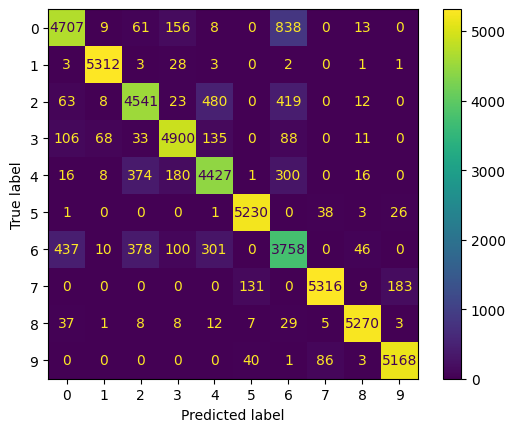

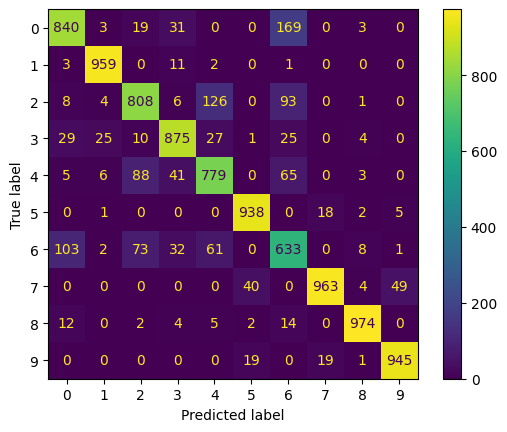

In [3]:
#Testing the dataset with the best parameters

import wandb

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data();

x_train = x_train.astype('float32') / 255;
x_test = x_test.astype('float32') / 255;

num_inputs = x_train.shape[1]*x_train.shape[2];
num_validation_data = int(0.1*x_train.shape[0]);
num_train_data = x_train.shape[0] - num_validation_data;

x_train = x_train.reshape(x_train.shape[0],num_inputs);
x_test = x_test.reshape(x_test.shape[0],num_inputs);
print(x_test.shape);
x_valid = [];
y_valid = [];
y_train_only = [];

for i in range(num_train_data):
    y_train_only.append(y_train[i]);

for i in range(num_validation_data):
    x_valid.append(x_train[-i]);
    y_valid.append(y_train[-i]);

num_test_data = x_test.shape[0];
print(num_test_data)
Y_test = np.zeros((num_test_data,10));
for i in range(num_test_data):
    value = y_test[i];
    Y_test[i][int(value)] = 1.0;


sweep_config = {
    'method' : 'random',
    'metric' :
    {
        'name' : 'accuracy',
        'goal' : 'maximize'
    },
    'parameters' :
    {
        'num_epochs' : { 'values' : [15]},
        'num_hidden_layers' : { 'values' : [ 4 ]},
        'hidden_layer_nodes' : { 'values' : [128]},
        'weight_decay' : { 'values' : [0]},
        'learning_rate' : { 'values' : [1e-3]},
        'optimiser' : { 'values' : ['nadam']},
        'batch_size' : { 'values' : [16]},
        'weight_init' : {'values' : ['xavier']},
        'activation_fn' : {'values' : ['sigmoid']},
        'loss_fn' : {'values' : ['crossEntropy']}
    }


}

sweep_id = wandb.sweep(sweep=sweep_config, entity = 'ee21s125', project='EE21S125_DL_A1');



def main(config = None):

        test_loss = [];
        y_pred_test = [];
        Y_train_pred = [];
        Y_test_pred = [];
        with wandb.init(config = config):
            print(wandb.config)
            num_epochs = wandb.config.num_epochs;
            learning_rate = wandb.config.learning_rate;
            num_hidden_layers = wandb.config.num_hidden_layers;
            hidden_layer_nodes = wandb.config.hidden_layer_nodes;
            weight_init = wandb.config.weight_init;
            activation_fn = wandb.config.activation_fn;
            loss_fn = wandb.config.loss_fn;
            optimiser = wandb.config.optimiser;
            weight_decay = wandb.config.weight_decay;
            batch_size = wandb.config.batch_size;
            gamma = 0.9;
            epsilon = 1e-8;
            beta = 0.95;
            beta1 = 0.9;
            beta2 = 0.999;

            wandb.run.name = activation_fn+"_hl_"+str(hidden_layer_nodes)+"_loss_"+loss_fn+"_epochs_"+str(num_epochs)+"__bs__"+str(batch_size) + str(weight_decay)+"_weight_decay_"+optimiser+"_optimiser_";
            NN = neuralNetwork(num_inputs, num_hidden_layers, hidden_layer_nodes, learning_rate, num_epochs, weight_init, activation_fn, loss_fn, num_train_data, num_validation_data, optimiser, weight_decay, batch_size,
                  gamma, epsilon, beta, beta1, beta2, x_train, y_train, x_valid, y_valid);


            if(wandb.config.optimiser == "sgd"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.sgd();
            elif(wandb.config.optimiser == "momentum"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.mgd();
            elif(wandb.config.optimiser == "nesterov"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.nag();
            elif(wandb.config.optimiser == "rmsProp"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.rmsProp();
            elif(wandb.config.optimiser == "adam"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.adam();
            elif(wandb.config.optimiser == "nadam"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.nadam();

            y_pred_test = NN.predict(x_test);
            print("Test Data Set is done...")
            test_accuracy = NN.accuracy(Y_test, y_pred_test, num_test_data);
            print("Test accuracy:", test_accuracy);

            for i in range(num_test_data):
              test_loss.append(NN.calculateCrossEntropyLoss(Y_test[i].reshape(1,10), y_pred_test[i]) + NN.L2RegularisationLoss());
            print("Test Loss:",np.mean(test_loss));
            wandb.log({'Test Accuracy':test_accuracy,'Test Loss':np.mean(test_loss)})

            for i in range(num_train_data):
              Y_train_pred.append(np.argmax(y_pred_train[i]));
            for i in range(num_test_data):
              Y_test_pred.append(np.argmax(y_pred_test[i]));

            conf_mat = confusion_matrix(Y_train_pred,y_train_only);
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = np.array(range(10)))

            cm_display.plot();
            fig_path = "train_conf_matrix.png";
            plt.savefig(fig_path);
            wandb.log({"train_conf_matrix": wandb.Image(Image.open(fig_path))});



            conf_mat = confusion_matrix(Y_test_pred,y_test);
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = np.array(range(10)))

            cm_display.plot();
            fig_path = "test_conf_matrix.png";
            plt.savefig(fig_path);
            wandb.log({"test_conf_matrix": wandb.Image(Image.open(fig_path))});




wandb.agent(sweep_id,function=main,count=1);
wandb.finish();

In [7]:
#Train and Test using MNIST Dataset
import wandb

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data();

x_train = x_train.astype('float32') / 255;
x_test = x_test.astype('float32') / 255;

num_inputs = x_train.shape[1]*x_train.shape[2];
num_validation_data = int(0.1*x_train.shape[0]);
num_train_data = x_train.shape[0] - num_validation_data;

x_train = x_train.reshape(x_train.shape[0],num_inputs);
x_test = x_test.reshape(x_test.shape[0],num_inputs);
print(x_test.shape);
x_valid = [];
y_valid = [];
y_train_only = [];

for i in range(num_train_data):
    y_train_only.append(y_train[i]);

for i in range(num_validation_data):
    x_valid.append(x_train[-i]);
    y_valid.append(y_train[-i]);

num_test_data = x_test.shape[0];
print(num_test_data)
Y_test = np.zeros((num_test_data,10));
for i in range(num_test_data):
    value = y_test[i];
    Y_test[i][int(value)] = 1.0;


sweep_config = {
    'method' : 'random',
    'metric' :
    {
        'name' : 'accuracy',
        'goal' : 'maximize'
    },

    'parameters' :
    {
        'num_epochs' : { 'values' : [15]},
        'num_hidden_layers' : { 'values' : [ 4 ]},
        'hidden_layer_nodes' : { 'values' : [128]},
        'weight_decay' : { 'values' : [0]},
        'learning_rate' : { 'values' : [1e-3]},
        'optimiser' : { 'values' : ['nadam']},
        'batch_size' : { 'values' : [16]},
        'weight_init' : {'values' : ['xavier']},
        'activation_fn' : {'values' : ['sigmoid']},
        'loss_fn' : {'values' : ['crossEntropy']}
    }


}

sweep_id = wandb.sweep(sweep=sweep_config, entity = 'ee21s125', project='EE21S125_DL_A1');



def main(config = None):

        test_loss = [];
        y_pred_test = [];
        Y_train_pred = [];
        Y_test_pred = [];

        with wandb.init(config = config):
            print(wandb.config)
            num_epochs = wandb.config.num_epochs;
            learning_rate = wandb.config.learning_rate;
            num_hidden_layers = wandb.config.num_hidden_layers;
            hidden_layer_nodes = wandb.config.hidden_layer_nodes;
            weight_init = wandb.config.weight_init;
            activation_fn = wandb.config.activation_fn;
            loss_fn = wandb.config.loss_fn;
            optimiser = wandb.config.optimiser;
            weight_decay = wandb.config.weight_decay;
            batch_size = wandb.config.batch_size;
            gamma = 0.9;
            epsilon = 1e-8;
            beta = 0.95;
            beta1 = 0.9;
            beta2 = 0.999;

            wandb.run.name = "MNIST"+activation_fn+"_hl_"+str(hidden_layer_nodes)+"_loss_"+loss_fn+"_epochs_"+str(num_epochs)+"__bs__"+str(batch_size) + str(weight_decay)+"_weight_decay_"+optimiser+"_optimiser_";
            NN = neuralNetwork(num_inputs, num_hidden_layers, hidden_layer_nodes, learning_rate, num_epochs, weight_init, activation_fn, loss_fn, num_train_data, num_validation_data, optimiser, weight_decay, batch_size,
                  gamma, epsilon, beta, beta1, beta2, x_train, y_train, x_valid, y_valid);


            if(wandb.config.optimiser == "sgd"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.sgd();
            elif(wandb.config.optimiser == "momentum"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.mgd();
            elif(wandb.config.optimiser == "nesterov"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.nag();
            elif(wandb.config.optimiser == "rmsProp"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.rmsProp();
            elif(wandb.config.optimiser == "adam"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.adam();
            elif(wandb.config.optimiser == "nadam"):
                        training_loss, training_accuracy, validation_accuracy, y_pred_train = NN.nadam();

            y_pred_test = NN.predict(x_test);
            print("Test Data Set is done...")
            test_accuracy = NN.accuracy(Y_test, y_pred_test, num_test_data);
            print("Test accuracy:", test_accuracy);

            for i in range(num_test_data):
              test_loss.append(NN.calculateCrossEntropyLoss(Y_test[i].reshape(1,10), y_pred_test[i]) + NN.L2RegularisationLoss());
            print("Test Loss:",np.mean(test_loss));
            wandb.log({'Test Accuracy':test_accuracy,'Test Loss':np.mean(test_loss)})




wandb.agent(sweep_id,function=main,count=1);
wandb.finish();

11490434/11490434 [==============================] - 0s 0us/step
(10000, 784)
10000
Create sweep with ID: pxo2hjsi
Sweep URL: https://wandb.ai/ee21s125/EE21S125_DL_A1/sweeps/pxo2hjsi


wandb: Agent Starting Run: 8jjjzyzx with config:
wandb: 	activation_fn: sigmoid
wandb: 	batch_size: 16
wandb: 	hidden_layer_nodes: 128
wandb: 	learning_rate: 0.001
wandb: 	loss_fn: crossEntropy
wandb: 	num_epochs: 15
wandb: 	num_hidden_layers: 4
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


{'activation_fn': 'sigmoid', 'batch_size': 16, 'hidden_layer_nodes': 128, 'learning_rate': 0.001, 'loss_fn': 'crossEntropy', 'num_epochs': 15, 'num_hidden_layers': 4, 'optimiser': 'nadam', 'weight_decay': 0, 'weight_init': 'xavier'}
[784, 128, 128, 128, 128, 10]
Epoch: 0  Loss: 0.057235251711892074  Training accuracy: 0.912425925925926  Validation Accuracy: 0.927  Time: 131.4769401550293  Learning Rate: 0.001 Validation loss: 0.025509616720221145 MSE Loss: 0.025227965728548674
Epoch: 1  Loss: 0.026730536592711268  Training accuracy: 0.9302777777777778  Validation Accuracy: 0.941  Time: 137.69336891174316  Learning Rate: 0.001 Validation loss: 0.0226361493697041 MSE Loss: 0.01846745099577921
Epoch: 2  Loss: 0.021307584793040294  Training accuracy: 0.9419814814814815  Validation Accuracy: 0.9546666666666667  Time: 149.33744144439697  Learning Rate: 0.001 Validation loss: 0.020601594189802463 MSE Loss: 0.015433340850401893
Epoch: 3  Loss: 0.017976070756467923  Training accuracy: 0.9500185

Test Accuracy,▁
Test Loss,▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▄▃▃▂▂▂▂▂▁▁▁▁▁▁
mse_loss,█▅▄▄▃▃▂▂▂▂▂▁▁▁▁
training_accuracy,▁▃▄▅▅▆▆▇▇▇▇▇███
validation_accuracy,▁▃▅▆▆▇▇▇▇▇▇████
validation_loss,█▆▅▄▄▃▃▂▂▂▂▁▁▁▁
Test Accuracy,0.9697
Test Loss,0.01033
epoch,14
